### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import neccesary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Sense check the data and identify column data types
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


- There are no null values. 
- The target variable for linear regression is in column 4: loyalty_points.
- The review and summary columns are object data types but are not categorical variables. 

In [4]:
# Confirm that there are no null values. 
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

I will drop the column 'Platform' because all of the reviews in the data were scraped from the Turtle Games website. I will also drop the 'Language' column because all of the reviews are in English. 

In [8]:
# Drop unnecessary columns.
reviews_clean = reviews.drop(columns=['language', 'platform'])

# View column names.
reviews_clean.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

I will remove special characters from 'remuneration (k£)' and 'spending_score (1-100)' to make the data easier to work with.

In [10]:
# Rename the column headers.
reviews_clean.rename(columns={'remuneration (k£)':'renumeration','spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
reviews_clean.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews_clean.to_csv('reviews_clean.csv')

In [22]:
# Import new CSV file with Pandas.
reviews_final = pd.read_csv('reviews_clean.csv')

# View DataFrame.
reviews_final.head()

,Unnamed: 0,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [23]:
# View the column names.
reviews_final.columns

Index(['Unnamed: 0', 'gender', 'age', 'renumeration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

The new column 'Unnamed: 0' may be the index values from the first time the dataframe was imported.

In [24]:
# View 'Unnamed: 0'
reviews_final['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
1995    1995
1996    1996
1997    1997
1998    1998
1999    1999
Name: Unnamed: 0, Length: 2000, dtype: int64

In [25]:
# Drop Unnamed: 0
reviews_final = reviews_final.drop(columns = 'Unnamed: 0')

# View the columns in the dataframe
reviews_final.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 5. Linear regression

A simple multiple linear regression model is fit to the variables spending scores, age and renumeration to try determine if they are good predictors for the number of loyalty points a customer has. 

### 5a) spending vs loyalty

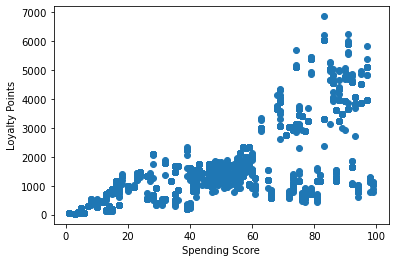

In [48]:
# Independent variable.
x = reviews_final['spending_score']

# Dependent variable.
y = reviews_final['loyalty_points']

# Check for data for linearity.
plt.ylabel('Loyalty Points')
plt.xlabel('Spending Score')
plt.scatter(x, y)

In [49]:
# Use OLS to find the line of best fit. 

# Create the formula to pass through the OLS methods.
f = 'y ~ x'
reviews_OLS = ols(f, data = reviews_final).fit()

In [50]:
# Extract the estimated parameters.
print('Parameters: ', reviews_OLS.params)
print()

# Extract the standard errors.
print('Standard errors: ', reviews_OLS.bse)
print()

# Extract the predicted values.
print('Predicted values: ', reviews_OLS.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64

Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64

Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [51]:
# Set the x coefficient and constant
c = reviews_OLS.params[0]
m = reviews_OLS.params[1]

# Print the regression table
reviews_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        17:54:54   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Key results for the model:
- R-Squared (Coefficient of determination) = 0.452. 
    - 45.2% of the variation in Loyalty Points that can be explained by Spending. 
- F Statistic Probability is very close to zero. This means that there is sufficient evidence to conclude, at a significance level as small as 0.01,  that the *model fits the data better than a model with zero predictor variables.* 

Key results for the variable:
- The intercept has a high p-value for the two-sided t test. Using a significance level of 0.05, the null hypothesis that the actual x-intercept is zero cannot be rejected. The x-intercept is not statistically significant.
- The independent variable has a p-value = 0 for the two sided t-test. At a significance level of 0.05, the null hypothesis that the true value of the coefficient is zero can be rejected. There is sufficient evidence to indicate that there is a *strong relationship* between spending score and the number of loyalty points that a customer has. 
- The x coefficient is 33.0617. This means that for a one unit change in customer spending score, we can expect the number of loyalty points the customer has to increase by a factor of 33.0617. 

In [52]:
# Sense the intercept and coefficient are set correctly. 
print(c, " ", m)

-75.0526629336477   33.06169325867304


In [53]:
# Create a linear equation and plot the regression model
y_pred = m*x + c

y_pred

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: spending_score, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Linear Regression of Loyalty Points on Spending Score')

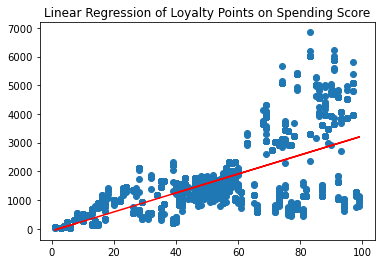

In [54]:
# Plot the original data using a scatterplot
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, y_pred, color='red')

# Set plot details
plt.title("Linear Regression of Loyalty Points on Spending Score")

It can be seen from the above plot that the model fits the data reasonably well at low spending scores, but not for high spending scores. The distance between the predicted values and the actual values increases as spending score increases. 
This corresponds with the low R-Squared value, which indicated that only roughly 46% of the variability in loyalty points can be explained by customer spending score. Considering that the F-test indicated that the model is statistically significant, I conclude that there is a relationship between customer spending score and loyalty points. Other variables may, however, explain loyalty points better. The explanatory accuracy of the model may also be increased by adding variables to the model.

### 5b) renumeration vs loyalty

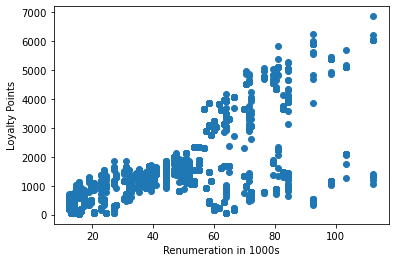

In [73]:
# Independent variable.
x = reviews_final['renumeration']

# Dependent variable.
y = reviews_final['loyalty_points']

# Check for data for linearity.
plt.ylabel('Loyalty Points')
plt.xlabel('Renumeration in 1000s')
plt.scatter(x, y)

The scatterplot looks similar to the plot for spending score vs loyalty points. I expect that the regression model will yield similar results as the previous model, due to the data being distributed similarly. 

In [74]:
# Use OLS to find the line of best fit. 

# Create the formula to pass through the OLS methods.
f = 'y ~ x'
reviews_OLS = ols(f, data = reviews_final).fit()

In [75]:
# Extract the estimated parameters.
print('Parameters: ', reviews_OLS.params)
print()

# Extract the standard errors.
print('Standard errors: ', reviews_OLS.bse)
print()

# Extract the predicted values.
print('Predicted values: ', reviews_OLS.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64

Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64

Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [76]:
# Set the x coefficient and constant
c = reviews_OLS.params[0]
m = reviews_OLS.params[1]

# Print the regression table
reviews_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        19:36:44   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Key results for the model:
- R-Squared (Coefficient of determination) = 0.38. 
    - 38% of the variation in Loyalty Points that can be explained by Renumeration. 
- F Statistic Probability is very close to zero. This means that there is sufficient evidence to conclude, at a significance level as small as 0.01,  that the *model fits the data better than a model with zero predictor variables.* There is therefore a relationship between renumeration and loyalty points. 

Key results for the variable:
- The intercept has a high p-value for the two-sided t test. Using a significance level of 0.05, the null hypothesis that the actual x-intercept is zero cannot be rejected. The x-intercept is not statistically significant.
- The independent variable has a p-value = 0 for the two sided t-test. At a significance level of 0.05, the null hypothesis that the true value of the coefficient is zero can be rejected. There is sufficient evidence to indicate that there is a *strong relationship* between renumeration and the number of loyalty points that a customer has. 
- The x coefficient is 34.1878. This means that for a one unit change in renumeration, we can expect the number of loyalty points the customer has to increase by a factor of 34.1878. 

In [77]:
# Sense the intercept and coefficient are set correctly. 
print(c, " ", m)

-65.68651279500466   34.187825485668895


In [78]:
# Create a linear equation and plot the regression model
y_pred = m*x + c

y_pred

0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Name: renumeration, Length: 2000, dtype: float64

Text(0.5, 0, 'Renumeration in 1000s')

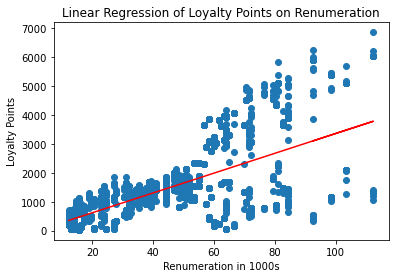

In [80]:
# Plot the original data using a scatterplot
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, y_pred, color='red')

# Set plot details
plt.title("Linear Regression of Loyalty Points on Renumeration")
plt.ylabel('Loyalty Points')
plt.xlabel('Renumeration in 1000s')

Similar to the model fit using spending score, this model fits the data reasonably well for salaries between zero and close to sixty-thousand. The distance between the predicted values and the actual data increases for salaries including and above 60 000 pounds. 
This may explain why the key results for the overall model conflict with the key results for the coefficient. The low R-squared value for the model with high significance for the coefficiet of x may be because the model does not predict loyalty points for high-earning customers as well as it preicts loyalty points for low-earning customers. 

Considering that the F-test indicated that the model is statistically significant, I conclude that there is a relationship between customer spending score and loyalty points. Other variables may, however, explain loyalty points better. The explanatory accuracy of the model may also be increased by adding variables to the model.

### 5c) age vs loyalty

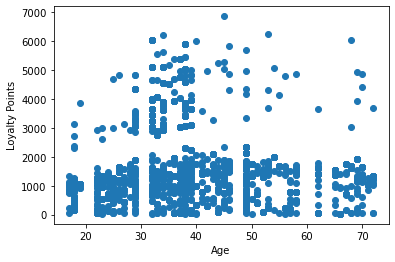

In [81]:
# Independent variable.
x = reviews_final['age']

# Dependent variable.
y = reviews_final['loyalty_points']

# Check for data for linearity.
plt.ylabel('Loyalty Points')
plt.xlabel('Age')
plt.scatter(x, y)

This data is distributed very differently to the past two variables. It is also seems to be grouped according to age ranges. The data values within age ranges seems to be similarly distributed. 

In [63]:
# Use OLS to find the line of best fit. 

# Create the formula to pass through the OLS methods.
f = 'y ~ x'
reviews_OLS = ols(f, data = reviews_final).fit()

In [64]:
# Extract the estimated parameters.
print('Parameters: ', reviews_OLS.params)
print()

# Extract the standard errors.
print('Standard errors: ', reviews_OLS.bse)
print()

# Extract the predicted values.
print('Predicted values: ', reviews_OLS.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64

Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64

Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [65]:
# Set the x coefficient and constant
c = reviews_OLS.params[0]
m = reviews_OLS.params[1]

# Print the regression table
reviews_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 07 Aug 2022   Prob (F-statistic):             0.0577
Time:                        18:04:03   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Key results for the model:

- R-Squared (Coefficient of determination) = 0.002.
    -0.2% of the variation in Loyalty Points that can be explained by Age.
- F Statistic Probability is 0.0577. At a significance level of 0.05, there is not sufficient evidence to reject the null hypothesis that a zero variable model will fit the data better than this one. There is not a strong explantory relationship between age and loyalty points. 

Key results for the variable:
- The intercept has a p-value of zero for the two-sided t test. The x-intercept is statistcally significant. The F-test for the model suggests that a no-variable models fits the data better than the constructed here. This is why the intercept is statistically significant. 
- The independent variable has a p-value = 0.058 for the two sided t-test. At a significance level of 0.05, the null hypothesis that the true value of the coefficient is zero cannot be rejected. There is not sufficient evidence to indicate that there is a strong relationship between renumeration and the number of loyalty points that a customer has.


In [82]:
# Sense the intercept and coefficient are set correctly. 
print(c, " ", m)

-65.68651279500466   34.187825485668895


In [83]:
# Create a linear equation and plot the regression model
y_pred = m*x + c

y_pred

0        549.694346
1        720.633473
2        686.445648
3        789.009124
4       1062.511728
           ...     
1995    1199.263030
1996    1404.389983
1997    1096.699554
1998    1096.699554
1999    1028.323903
Name: age, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Linear Regression of Loyalty Points on Spending Score')

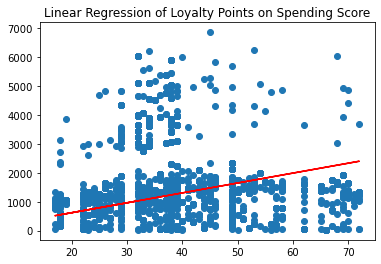

In [84]:
# Plot the original data using a scatterplot
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, y_pred, color='red')

# Set plot details
plt.title("Linear Regression of Loyalty Points on Spending Score")

Age is predictor of a customer's loyalty points accumulation. The above plot shows that the data is not clustered close to the regression line. This shows what the key results for the model above indicated: that the model is not a good fit for the data. 

## 6. Observations and insights

***Your observations here...***






Questions for next time:
- must outliers be removed? 
- must a cleaning of the data be conducted as in assignment one? 
- could renumeration and spending score be used in a multiple linear regression to more accurately explain how loyalty points are accumulated? 
    
    
Summary: 
- Age cannot be used to explain loyalty points. 
- Renumeration and spending score are averagly good at predicting spending score. Both of their model's F-tests indicate that there is a significant relationship between these variables and how customers accumulate loyalty points. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.


# View DataFrame.


In [ ]:
# Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Explore the data.


In [ ]:
# Descriptive statistics.


## 2. Plot

In [ ]:
# Create a scatterplot with Seaborn.


In [ ]:
# Create a pairplot with Seaborn.


## 3. Elbow and silhoutte methods

In [ ]:
# Determine the number of clusters: Elbow method.


In [ ]:
# Determine the number of clusters: Silhouette method.


## 4. Evaluate k-means model at different values of *k*

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.


In [ ]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.


# View the DataFrame.


In [ ]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 